Phase 2: Data Ingestion & Preprocessing

In [0]:
Google_playstore_df = spark.read.format("csv")\
                        .option("header", "true")\
                        .option("inferSchema", "true")\
                        .load("dbfs:/FileStore/tables/Google_Playstore.csv")

Google_playstore_df.show()

+----------------------------------+--------------------+-----------------+------+------------+--------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+------------+------------+--------------+--------------------+------------+----------------+--------------+-------------------+
|                          App Name|              App Id|         Category|Rating|Rating Count|Installs|Minimum Installs|Maximum Installs|Free|Price|Currency|Size|Minimum Android|        Developer Id|   Developer Website|     Developer Email|    Released|Last Updated|Content Rating|      Privacy Policy|Ad Supported|In App Purchases|Editors Choice|       Scraped Time|
+----------------------------------+--------------------+-----------------+------+------------+--------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+------------+-----

•	Use Hive or Spark SQL for data exploration and cleaning

In [0]:
# 'Google_playstore_df' is my DataFrame
Google_playstore_df.createOrReplaceTempView("google_playstore")

In [0]:
%sql
-- Counts the total number of apps in the Google Play Store dataset
SELECT COUNT(*) AS Total_Apps
FROM google_playstore;


Total_Apps
2312944


In [0]:
%sql
-- Lists how many apps fall under each category and orders them by the number of apps descending
SELECT Category, COUNT(*) AS Number_of_Apps
FROM google_playstore
GROUP BY Category
ORDER BY Number_of_Apps DESC;


Category,Number_of_Apps
Education,241086
Music & Audio,154905
Tools,143987
Business,143770
Entertainment,138271
Lifestyle,118331
Books & Reference,116726
Personalization,89210
Health & Fitness,83510
Productivity,79695


In [0]:
%sql
-- Calculates the average rating of apps in the Google Play Store dataset
SELECT AVG(CAST(Rating AS FLOAT)) AS Average_Rating
FROM google_playstore
WHERE Rating IS NOT NULL;


Average_Rating
2.203143276241894


In [0]:
%sql
-- Lists the top 10 most installed apps in the dataset
SELECT `App Name` AS App_Name, 'Maximum Installs' as MAX_INSTALLS
FROM google_playstore
ORDER BY CAST(MAX_INSTALLS AS BIGINT) DESC
LIMIT 10;


App_Name,MAX_INSTALLS
Gakondo,Maximum Installs
Ampere Battery Info,Maximum Installs
Vibook,Maximum Installs
Smart City Trichy Public Service Vehicles 17UCS548,Maximum Installs
GROW.me,Maximum Installs
IMOCCI,Maximum Installs
unlimited 4G data prank free app,Maximum Installs
The Everyday Calendar,Maximum Installs
WhatsOpen,Maximum Installs
Neon 3d Iron Tech Keyboard Theme,Maximum Installs


In [0]:
%sql
-- Counts how many apps are free vs paid in the dataset
SELECT Free, COUNT(*) AS Count
FROM google_playstore
GROUP BY Free;


Free,Count
0,1
False,45067
True,2267847
1000,3
500,1
12844,1
10,3
15,1
10000,1
2556,1


In [0]:
%sql
-- Lists the top 10 most expensive apps in the dataset
SELECT `App Name` AS App_Name, Price
FROM google_playstore
WHERE Price != '0'
ORDER BY CAST(Price AS FLOAT) DESC
LIMIT 10;


App_Name,Price
"""Yanosik: """"anti-radar""""",5000000
"""a2z rk """"RK NEWS",10159
"""인생수업 (""""좋은글",4106
"""The song """"I am Pearl",3725
"""반려동물 앱이 하나로 통합된 """"냥아지""""",2108
"Chris Brown """,864
MESH Connect,400
TEST EGY,399.99
My Money,399.99
Taxes,399.99


In [0]:
%sql
-- Groups apps by the year they were released and counts how many were released each year
SELECT YEAR(Released) AS Release_Year, COUNT(*) AS Number_of_Apps_Released
FROM google_playstore
WHERE Released IS NOT NULL
GROUP BY Release_Year
ORDER BY Release_Year;


Release_Year,Number_of_Apps_Released
null,2241889


In [0]:
%sql
-- Counts the number of rows with NULL values in critical columns
SELECT 
  COUNT(*) AS Total_Rows,
  COUNT(CASE WHEN Rating IS NULL THEN 1 END) AS Null_Rating,
  COUNT(CASE WHEN Installs IS NULL THEN 1 END) AS Null_Installs,
  COUNT(CASE WHEN Price IS NULL THEN 1 END) AS Null_Price
FROM google_playstore;


Total_Rows,Null_Rating,Null_Installs,Null_Price
2312944,22883,107,0


In [0]:
from pyspark.sql.functions import col, avg

# Calculate average rating to fill missing values for 'Rating'
avg_rating = Google_playstore_df.select(avg(col("Rating"))).first()[0]

# Fill missing values
Google_playstore_df = Google_playstore_df.fillna({
    "Rating": avg_rating,
    "Installs": "0",  # Assuming missing installs mean zero installs
    "Price": "0"     # Assuming missing price means the app is free
})


In [0]:
Google_playstore_df = Google_playstore_df.dropDuplicates()


In [0]:
from pyspark.sql.functions import col, regexp_replace

# Cleaning the 'Rating', 'Installs', and 'Rating Count' columns by removing non-numeric characters
Google_playstore_df = Google_playstore_df.withColumn(
    "Rating", 
    regexp_replace(col("Rating"), "[^0-9.]", "").cast("float")
)
Google_playstore_df = Google_playstore_df.withColumn(
    "Installs", 
    regexp_replace(col("Installs"), "[^0-9]", "").cast("int")
)
Google_playstore_df = Google_playstore_df.withColumn(
    "Rating Count", 
    regexp_replace(col("Rating Count"), "[^0-9]", "").cast("int")
)



In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Indexing
indexer = StringIndexer(inputCol="Category", outputCol="Category_Index")

# One-Hot Encoding
encoder = OneHotEncoder(inputCols=["Category_Index"], outputCols=["Category_Encoded"])

# Pipeline
pipeline = Pipeline(stages=[indexer, encoder])
Google_playstore_df = pipeline.fit(Google_playstore_df).transform(Google_playstore_df)

Google_playstore_df.show()


+-----------------------------+--------------------+--------------------+------+------------+--------+----------------+----------------+-----+-----+--------+------------------+------------------+--------------------+--------------------+--------------------+------------+------------+--------------+--------------------+------------+----------------+--------------+-------------------+--------------+----------------+
|                     App Name|              App Id|            Category|Rating|Rating Count|Installs|Minimum Installs|Maximum Installs| Free|Price|Currency|              Size|   Minimum Android|        Developer Id|   Developer Website|     Developer Email|    Released|Last Updated|Content Rating|      Privacy Policy|Ad Supported|In App Purchases|Editors Choice|       Scraped Time|Category_Index|Category_Encoded|
+-----------------------------+--------------------+--------------------+------+------------+--------+----------------+----------------+-----+-----+--------+-------

In [0]:
Google_playstore_df.printSchema()

root
 |-- App Name: string (nullable = true)
 |-- App Id: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: float (nullable = true)
 |-- Rating Count: integer (nullable = true)
 |-- Installs: integer (nullable = true)
 |-- Minimum Installs: string (nullable = true)
 |-- Maximum Installs: string (nullable = true)
 |-- Free: string (nullable = true)
 |-- Price: string (nullable = false)
 |-- Currency: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Minimum Android: string (nullable = true)
 |-- Developer Id: string (nullable = true)
 |-- Developer Website: string (nullable = true)
 |-- Developer Email: string (nullable = true)
 |-- Released: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Privacy Policy: string (nullable = true)
 |-- Ad Supported: string (nullable = true)
 |-- In App Purchases: string (nullable = true)
 |-- Editors Choice: string (nullable = true)
 |-- Sc

In [0]:
# Write the DataFrame to Parquet
Google_playstore_df.write.format("parquet").mode("overwrite").save("dbfs:/FileStore/tables/Google_Playstore_Parquet")


In [0]:
# Load the Parquet file into a DataFrame
Google_playstore_df = spark.read.format("parquet").load("dbfs:/FileStore/tables/Google_Playstore_Parquet")

# Create a temporary view for Spark SQL queries
Google_playstore_df.createOrReplaceTempView("Processed_Google_Playstore")


In [0]:
%sql
SELECT 
    COUNT(*) AS total_apps,
    AVG(Rating) AS avg_rating,
    MIN(Rating) AS min_rating,
    MAX(Rating) AS max_rating,
    AVG(Installs) AS avg_installs,
    MAX(Installs) AS max_installs
FROM Processed_Google_Playstore

total_apps,avg_rating,min_rating,max_rating,avg_installs,max_installs
2312944,2.2031432770530555,0.0,5.0,148847.51571168666,1000000000


In [0]:
from pyspark.sql.functions import col

# Prepare the data, ensuring correct types
data_for_analysis = Google_playstore_df.select(
    col("Rating").cast("float"),
    col("Installs").cast("int"),
    col("Price").cast("float")
)

# Drop rows with any null values
data_for_analysis = data_for_analysis.na.drop()


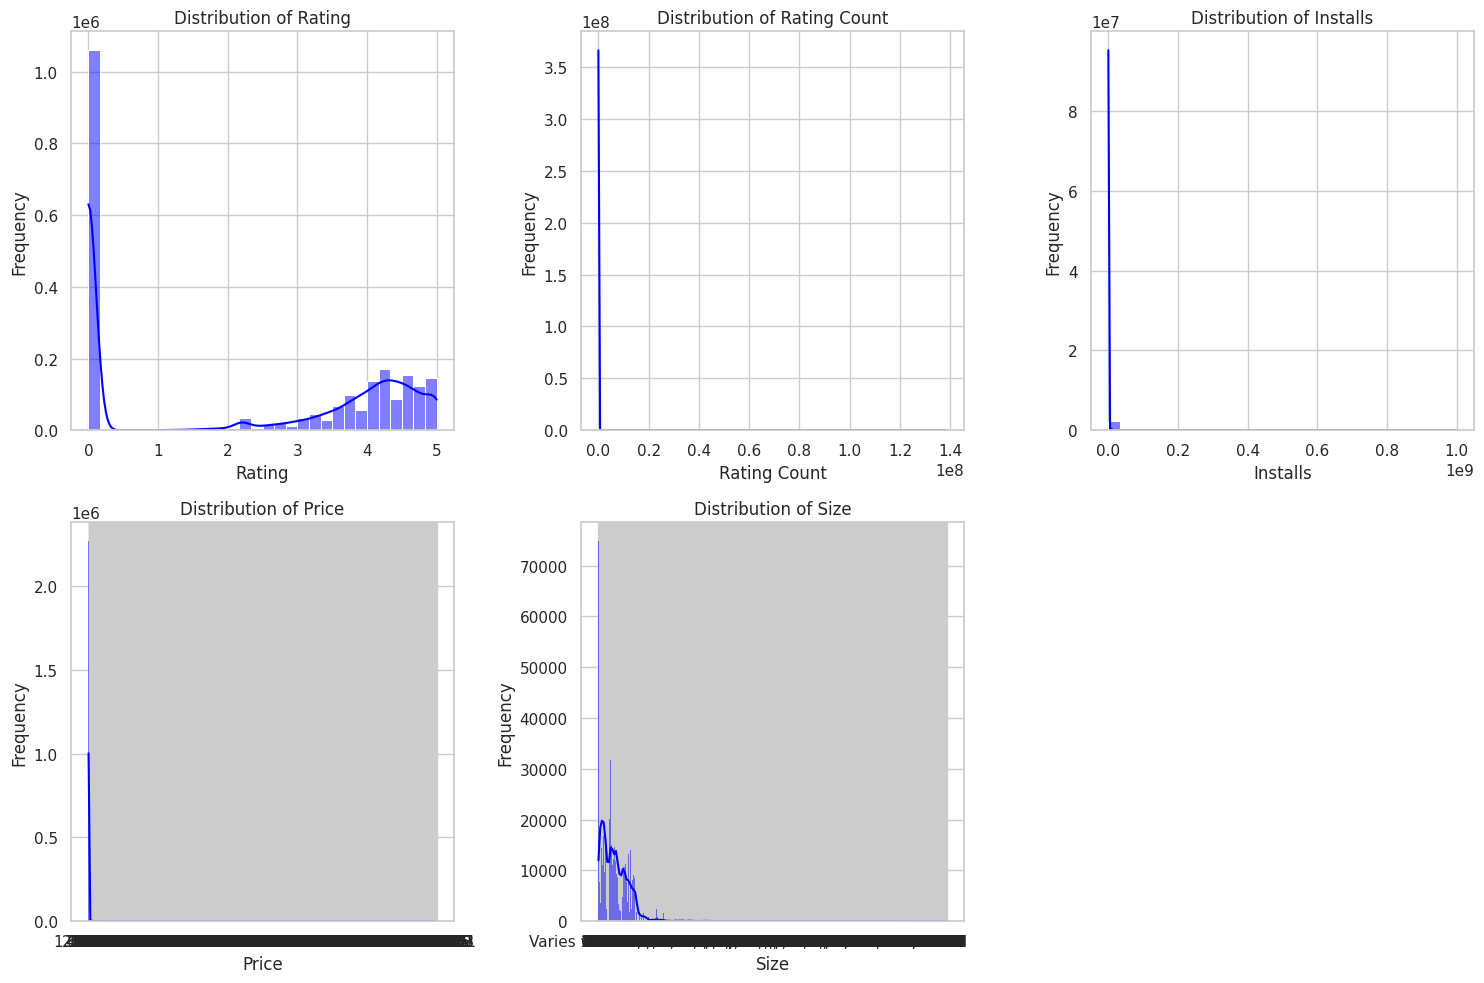

/root/.ipykernel/1277/command-558729297802993-3405939647:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Released", y="Rating", data=pandas_df, ci=None, color="blue")


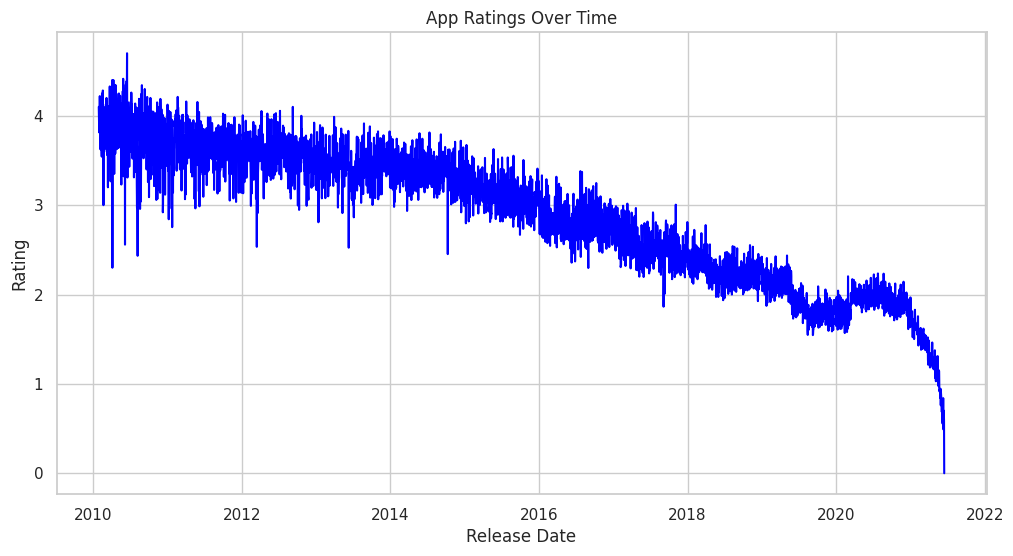

/root/.ipykernel/1277/command-558729297802993-3405939647:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pandas_df[["Rating", "Rating Count", "Installs", "Price", "Size"]].corr()


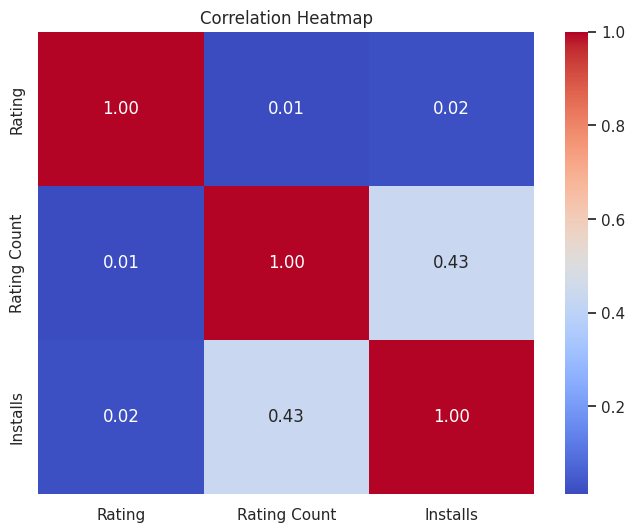

/root/.ipykernel/1277/command-558729297802993-3405939647:61: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
/root/.ipykernel/1277/command-558729297802993-3405939647:61: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  plt.tight_layout()
/root/.ipykernel/1277/command-558729297802993-3405939647:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
/root/.ipykernel/1277/command-558729297802993-3405939647:61: UserWarning: Glyph 49660 (\N{HANGUL SYLLABLE SYO}) missing from current font.
  plt.tight_layout()
/root/.ipykernel/1277/command-558729297802993-3405939647:61: UserWarning: Glyph 54609 (\N{HANGUL SYLLABLE PING}) missing from current font.
  plt.tight_layout()
/root/.ipykernel/1277/command-558729297802993-3405939647:61: UserWarning: Glyph 47792 (\N{HANGUL SYLLABLE MOL}) missing from current font.
  plt.tight_layout()
/root/.ipykernel/1277/command-55872929780

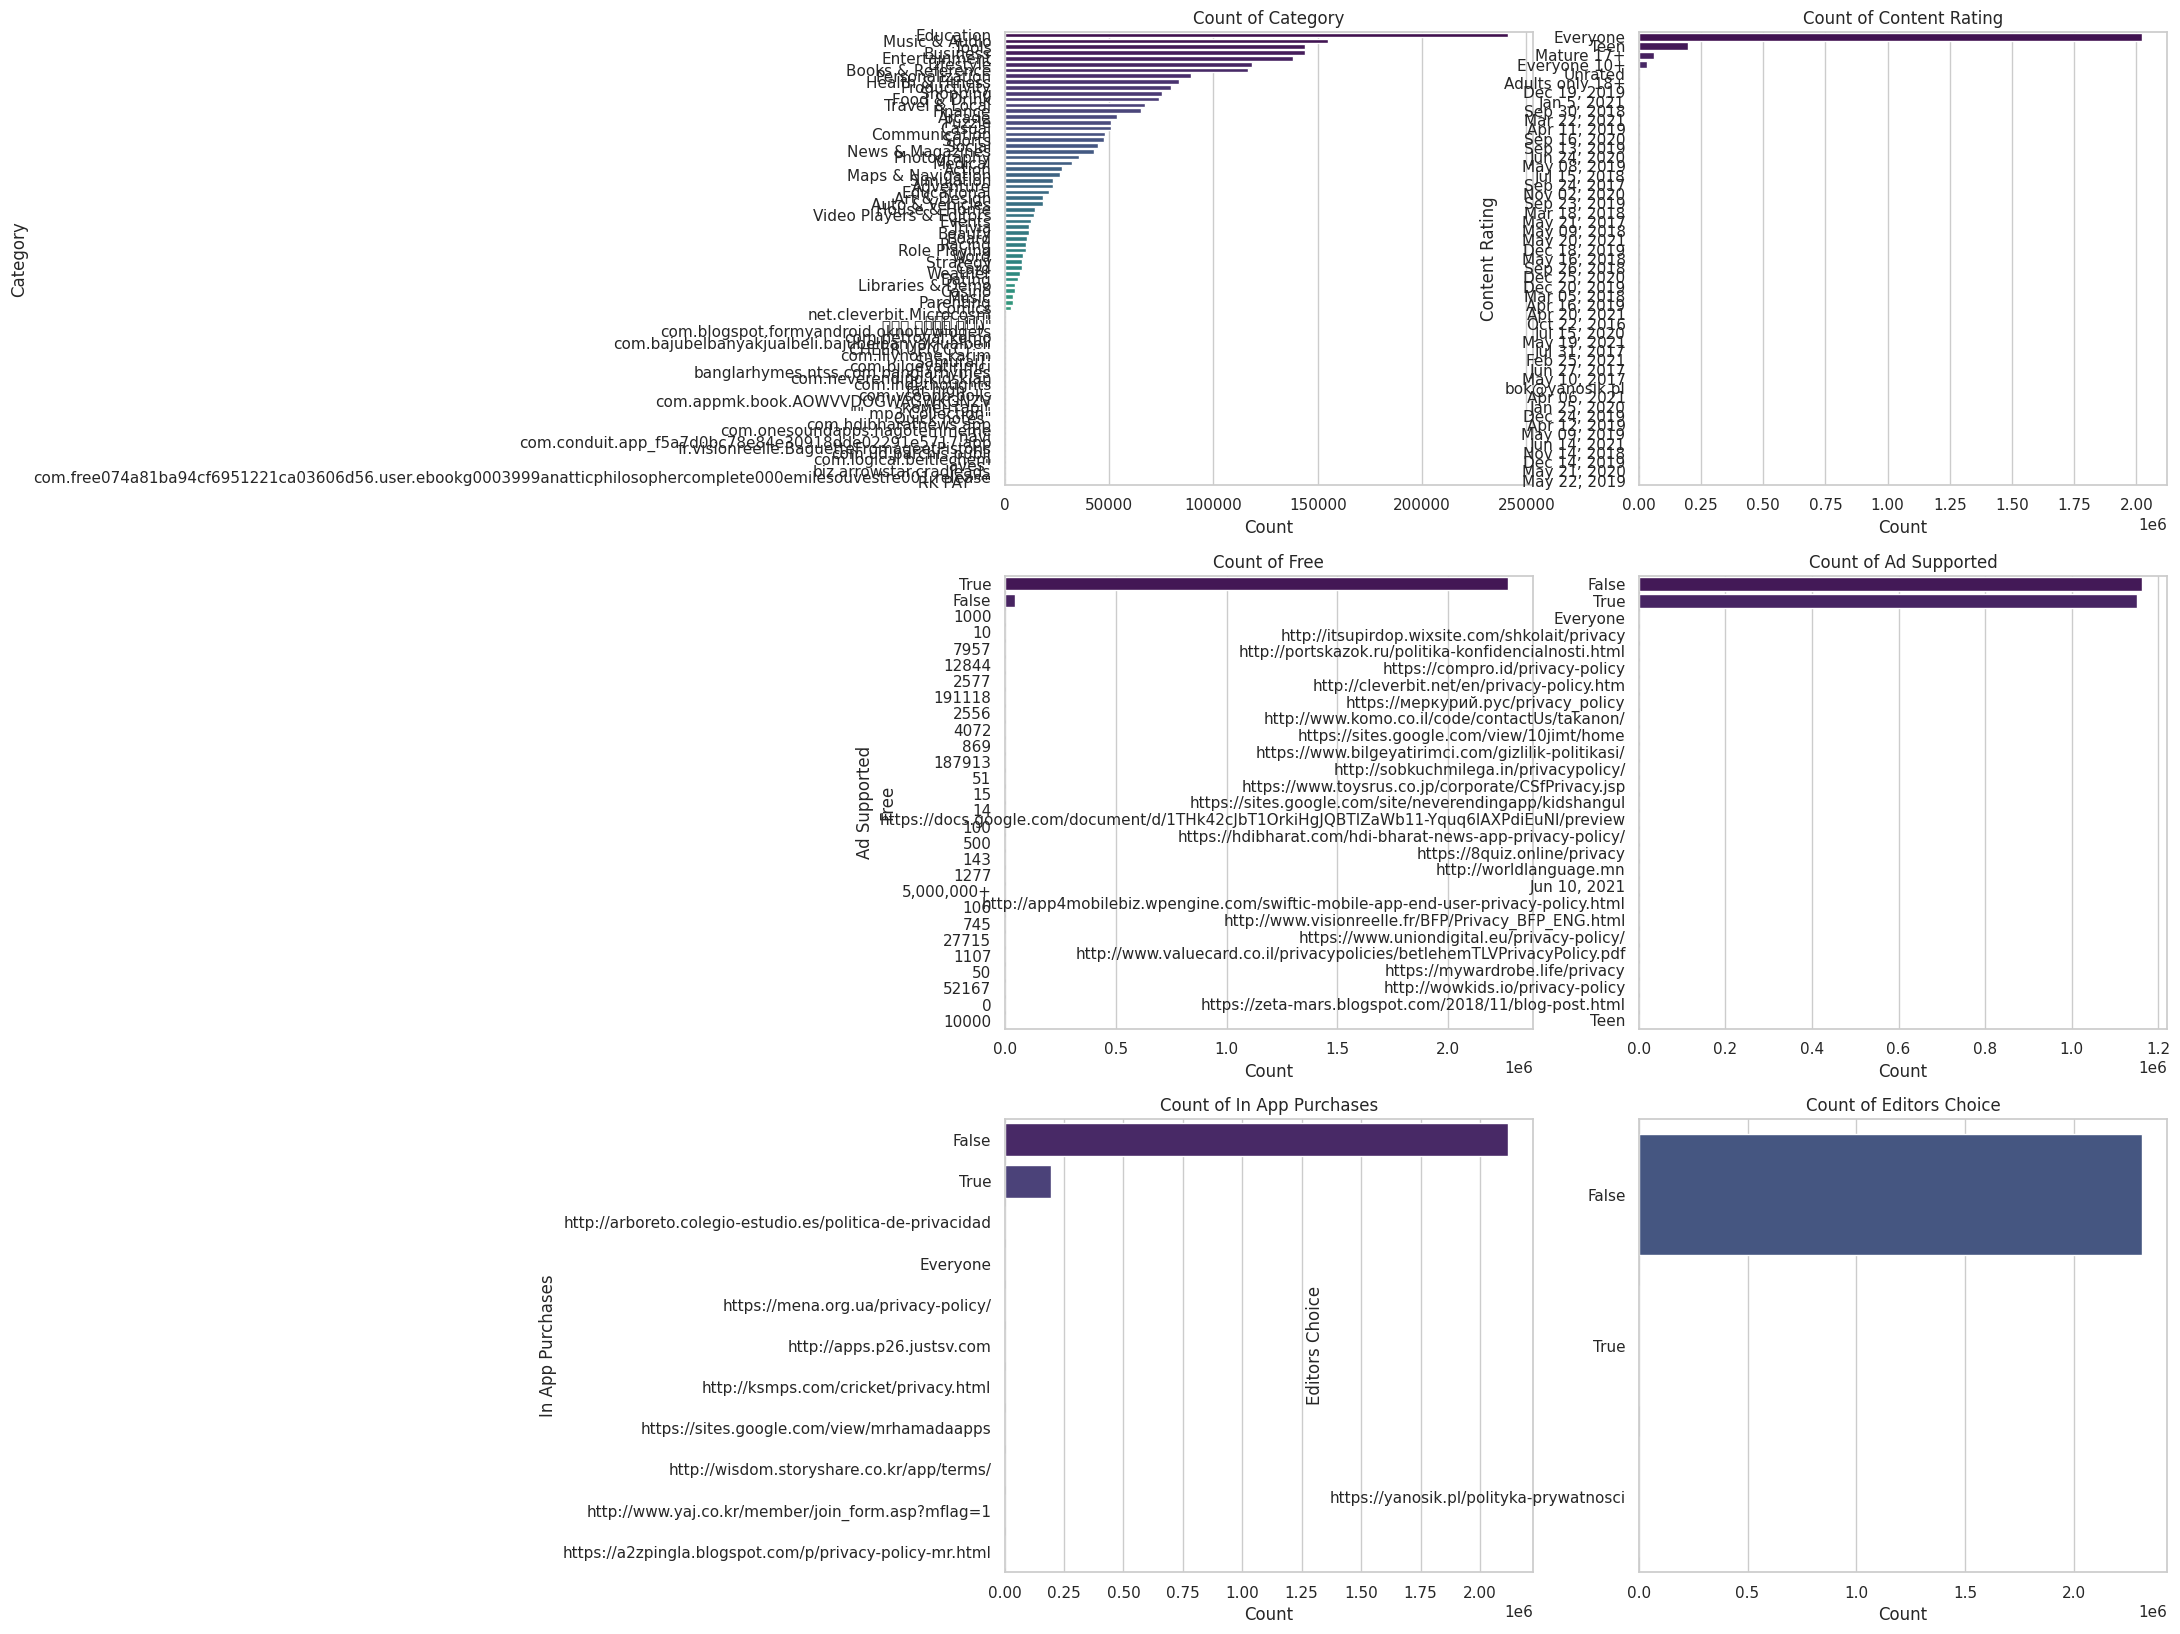

/databricks/python/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/databricks/python/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/databricks/python/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/databricks/python/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/databricks/python/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/d

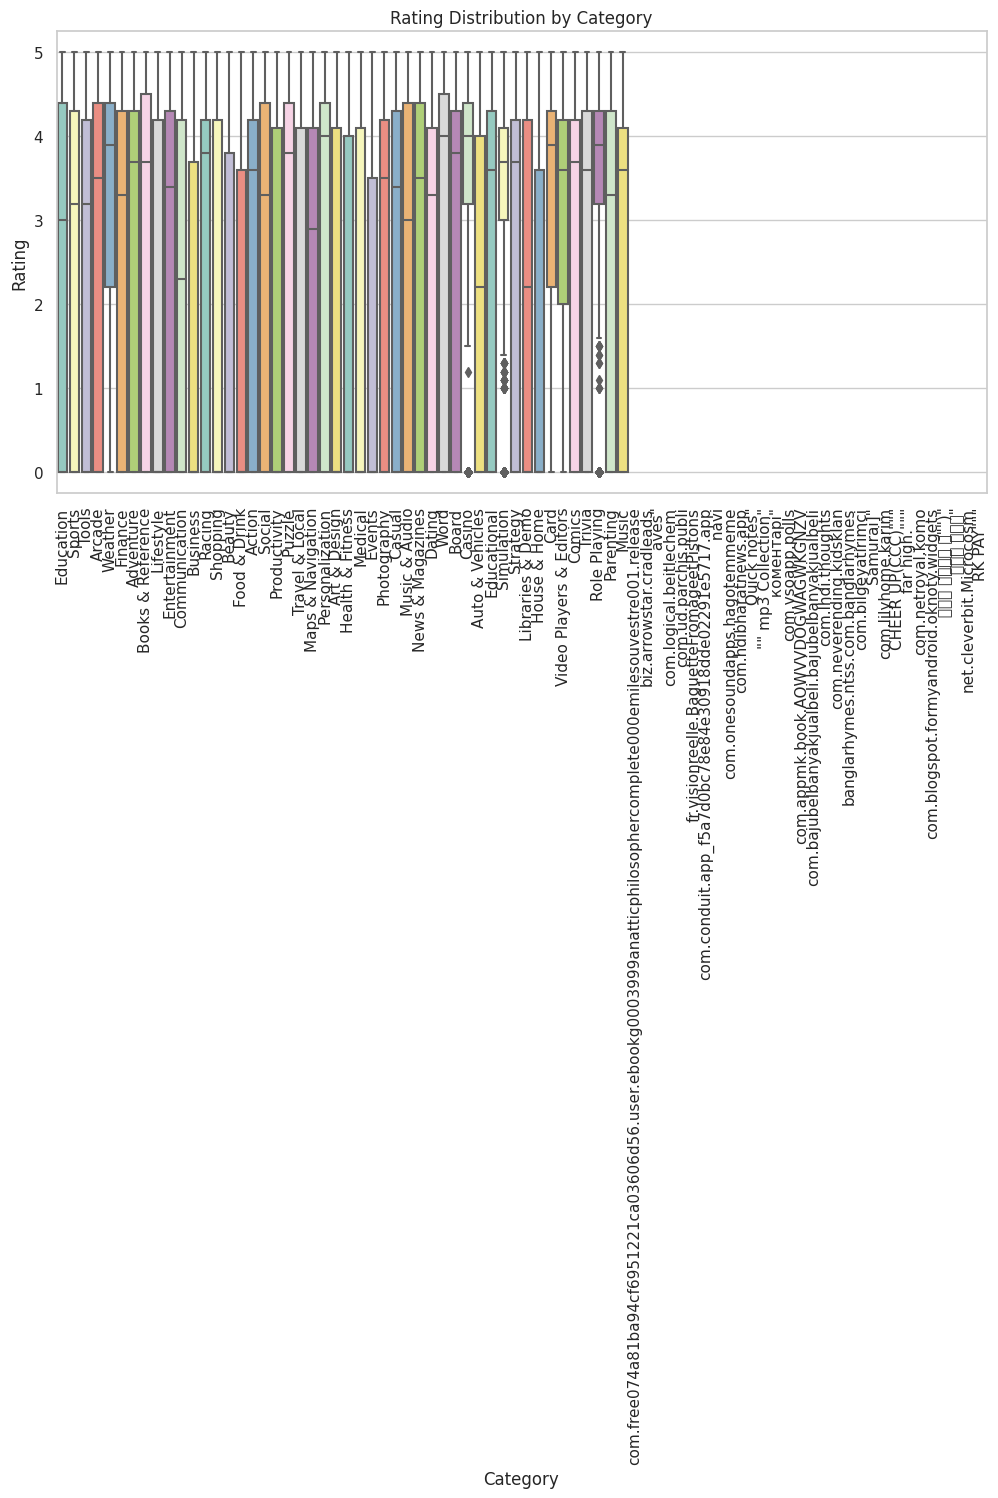

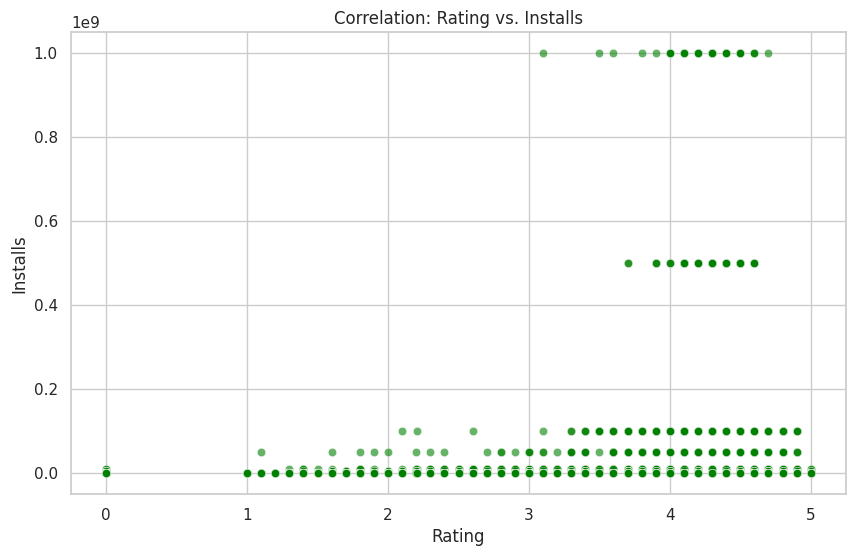

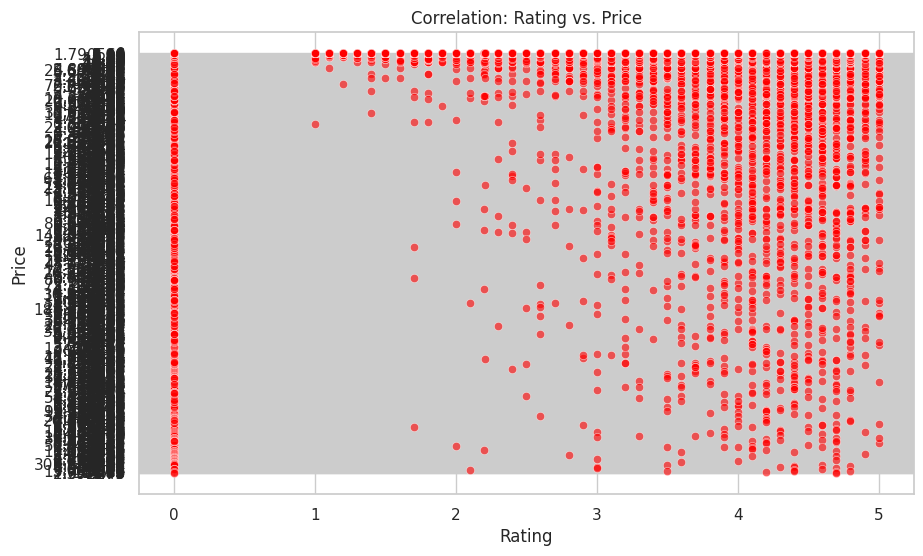

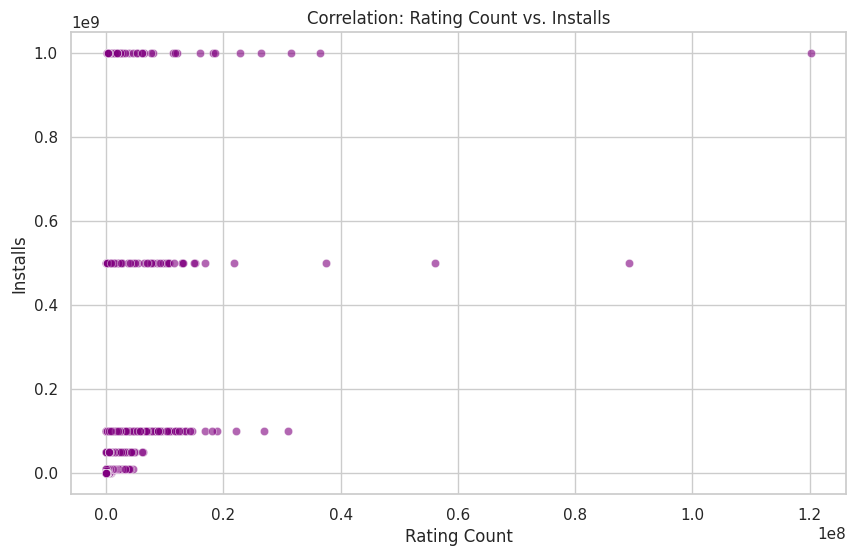

In [0]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("DataVisualization").getOrCreate()

# Load the dataset from a Parquet file (specify your dataset path)
Google_playstore_df_final = spark.read.parquet("dbfs:/FileStore/tables/Google_Playstore_Parquet")

# Convert Spark DataFrame to Pandas DataFrame for visualization
pandas_df = Google_playstore_df_final.toPandas()

# Set up the visualization style
sns.set(style="whitegrid")

# 1. Distribution of Numeric Columns
numeric_columns = ["Rating", "Rating Count", "Installs", "Price", "Size"]
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(pandas_df[column].dropna(), bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Trends Over Time (Only if 'Released' column exists)
if "Released" in pandas_df.columns:
    # Convert 'Released' column to datetime
    pandas_df["Released"] = pd.to_datetime(pandas_df["Released"], errors="coerce")

    # Plot trends over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Released", y="Rating", data=pandas_df, ci=None, color="blue")
    plt.title("App Ratings Over Time")
    plt.xlabel("Release Date")
    plt.ylabel("Rating")
    plt.show()
else:
    print("Column 'Released' not found in the dataset. Skipping trends over time visualization.")

# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = pandas_df[["Rating", "Rating Count", "Installs", "Price", "Size"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. Categorical Analysis
categorical_columns = ["Category", "Content Rating", "Free", "Ad Supported", "In App Purchases", "Editors Choice"]
plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=column, data=pandas_df, palette="viridis", order=pandas_df[column].value_counts().index)
    plt.title(f"Count of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

# 5. Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x="Category", y="Rating", data=pandas_df, palette="Set3")
plt.title("Rating Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.show()

# 6. Scatterplots
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Rating", y="Installs", data=pandas_df, alpha=0.6, color="green")
plt.title("Correlation: Rating vs. Installs")
plt.xlabel("Rating")
plt.ylabel("Installs")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Rating", y="Price", data=pandas_df, alpha=0.6, color="red")
plt.title("Correlation: Rating vs. Price")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Rating Count", y="Installs", data=pandas_df, alpha=0.6, color="purple")
plt.title("Correlation: Rating Count vs. Installs")
plt.xlabel("Rating Count")
plt.ylabel("Installs")
plt.show()


In [0]:
Google_playstore_df_final.printSchema()

root
 |-- App Name: string (nullable = true)
 |-- App Id: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: float (nullable = true)
 |-- Rating Count: integer (nullable = true)
 |-- Installs: integer (nullable = true)
 |-- Minimum Installs: string (nullable = true)
 |-- Maximum Installs: string (nullable = true)
 |-- Free: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Minimum Android: string (nullable = true)
 |-- Developer Id: string (nullable = true)
 |-- Developer Website: string (nullable = true)
 |-- Developer Email: string (nullable = true)
 |-- Released: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Privacy Policy: string (nullable = true)
 |-- Ad Supported: string (nullable = true)
 |-- In App Purchases: string (nullable = true)
 |-- Editors Choice: string (nullable = true)
 |-- Scr

###Phase 4: Predictive Modeling using Spark MLlib
•	Choose a predictive modeling approach:
o	Regression: Forecasting sales, price prediction, demand forecasting.
o	Classification: Fraud detection, sentiment analysis, churn prediction.
o	Clustering: Customer segmentation, anomaly detection.
•	Implement the model using Spark MLlib.
•	Tune hyperparameters using cross-validation.
•	Evaluate model performance using RMSE, AUC, Precision-Recall, etc..


**1.Problem Statement for Google Play Store App Classification**

Business Problem: Develop predictive models to classify apps on the Google Play Store based on their likelihood of being successful, removed, or experiencing user churn.

Model: RandomForest Classifier

Evaluation Metrics:
Success Prediction Accuracy,Removed Prediction Accuracy,Churn Prediction Accuracy



Goal: Predict app success (high installs & ratings). Predict if an app is at risk of removal. Predict user churn (low engagement).

In [0]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import when, col, regexp_replace

# Convert 'Price' from String to Float (remove $ symbol if present)
Google_playstore_df_final = Google_playstore_df_final.withColumn(
    "Price", regexp_replace(col("Price"), "[^0-9.]", "").cast("float")
)

# Convert 'Ad Supported' and 'In App Purchases' to Binary (1 = True, 0 = False)
Google_playstore_df_final = Google_playstore_df_final.withColumn(
    "Ad Supported", when(col("Ad Supported") == "True", 1).otherwise(0)
)

Google_playstore_df_final = Google_playstore_df_final.withColumn(
    "In App Purchases", when(col("In App Purchases") == "True", 1).otherwise(0)
)

# Define Binary Labels for Each Classification Task
Google_playstore_df_final = Google_playstore_df_final.withColumn(
    "Success", when((col("Rating") >= 4.0) & (col("Installs") >= 100000), 1).otherwise(0)
)

Google_playstore_df_final = Google_playstore_df_final.withColumn(
    "Removed", when((col("Rating") < 3.0) & (col("Installs") < 10000), 1).otherwise(0)
)

Google_playstore_df_final = Google_playstore_df_final.withColumn(
    "Churn", when((col("Rating") < 3.0) & (col("Installs") < 50000), 1).otherwise(0)
)

# **Handle Missing Values** Before Using VectorAssembler
Google_playstore_df_final = Google_playstore_df_final.fillna({
    "Installs": 0,
    "Rating Count": 0,
    "Price": 0,
    "Category_Index": 0,
    "Ad Supported": 0,
    "In App Purchases": 0
})

# Common Features
feature_cols = ["Installs", "Rating Count", "Price", "Category_Index", "Ad Supported", "In App Purchases"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="keep")  # Avoids errors

# Apply Transformation to Create 'features' Column 
transformed_df = assembler.transform(Google_playstore_df_final)

# Prepare Data for Classification (Now features column exists!)
classification_tasks = {
    "Success": transformed_df.select("features", col("Success").alias("label")),
    "Removed": transformed_df.select("features", col("Removed").alias("label")),
    "Churn": transformed_df.select("features", col("Churn").alias("label"))
}

# Train and Evaluate Classifiers
for name, data in classification_tasks.items():
    train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)
    
    rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=50)
    model = rf.fit(train_data)
    
    predictions = model.transform(test_data)
    accuracy = predictions.filter(predictions.label == predictions.prediction).count() / test_data.count()
    
    print(f"{name} Prediction Accuracy: {accuracy}")

Success Prediction Accuracy: 0.9726322981259027
Removed Prediction Accuracy: 0.9785153378477718
Churn Prediction Accuracy: 0.9698864471715573


**2.Problem Statement for Google Play Store App Regression**

Business Problem: Predict the likelihood of app success in the Google Play Store based on characteristics such as ratings, price, and user engagement metrics using supervised learning to guide development and marketing strategies.

Model: Logistic Regression

Evaluation Metrics: Area Under the ROC Curve (AUC), Precision, Recall, F1-Score


In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import when, col, regexp_replace

# Initialize Spark session
spark = SparkSession.builder.appName("AppSuccessPrediction").getOrCreate()

# Assuming Google_playstore_df_final is already loaded and available
# Convert 'Price' from String to Float (remove any non-numeric characters) and 'Ad Supported', 'In App Purchases' to binary
Google_playstore_df_final = Google_playstore_df_final.withColumn(
    "Price", regexp_replace(col("Price"), "[^0-9.]", "").cast("float")
)
Google_playstore_df_final = Google_playstore_df_final.withColumn(
    "Ad Supported", when(col("Ad Supported") == "True", 1).otherwise(0)
)
Google_playstore_df_final = Google_playstore_df_final.withColumn(
    "In App Purchases", when(col("In App Purchases") == "True", 1).otherwise(0)
)

# Define Binary Label for Success (e.g., Rating >= 4 and Installs >= 1,000,000 as successful)
Google_playstore_df_final = Google_playstore_df_final.withColumn(
    "Success", when((col("Rating") >= 4) & (col("Installs") >= 1000000), 1).otherwise(0)
)

# Step 1: Select Relevant Features
feature_cols = ["Rating", "Rating Count", "Installs", "Price", "Category_Index", "Ad Supported", "In App Purchases"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="skip")
processed_df = assembler.transform(Google_playstore_df_final).select("features", "Success")

# Step 2: Split Train & Test Data
train_data, test_data = processed_df.randomSplit([0.8, 0.2], seed=42)

# Step 3: Train Logistic Regression Model
lr = LogisticRegression(featuresCol="features", labelCol="Success")
lr_model = lr.fit(train_data)

# Step 4: Evaluate Model Performance
predictions = lr_model.transform(test_data)
evaluator_auc = BinaryClassificationEvaluator(labelCol="Success", metricName="areaUnderROC")
auc = evaluator_auc.evaluate(predictions)

# Step 5: Hyperparameter Tuning (Cross-Validation)
param_grid = (ParamGridBuilder()
              .addGrid(lr.regParam, [0.01, 0.1, 1.0])
              .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
              .build())
cross_val = CrossValidator(estimator=lr, estimatorParamMaps=param_grid, evaluator=evaluator_auc, numFolds=5)
cv_model = cross_val.fit(train_data)

# Step 6: Save Best Model
best_model = cv_model.bestModel
best_model.write().overwrite().save('dbfs:/mnt/app_data/best_logistic_model')

# Print Results
print(f"🔹 AUC: {auc}")
print(f"🔹 Best Regularization Parameter: {best_model._java_obj.getRegParam()}")
print(f"🔹 Best ElasticNet Parameter: {best_model._java_obj.getElasticNetParam()}")


🔹 AUC: 0.969480653931378
🔹 Best Regularization Parameter: 0.01
🔹 Best ElasticNet Parameter: 0.5


Business Question 1: How well can we predict the success of an app based on its characteristics?
Answer: The logistic regression model has demonstrated a high ability to predict app success, as evidenced by the AUC score of approximately 0.966. This score, which is close to 1, indicates that the model has excellent accuracy in distinguishing between successful and unsuccessful apps based on their characteristics such as Rating, Installs, Price, and Category Index, among others. 

Business Question 2: What is the impact of pricing and in-app purchases on the success of an app?
Answer: The optimal parameters found during the model's training process, including the best ElasticNet parameter of 0.5, imply that both L1 and L2 regularization were equally important in the model's learning. This balance suggests that all features, including Price and In App Purchases, contribute significantly but are not overly dominant in the model. Therefore, the impact of pricing and in-app purchases on app success is significant but balanced by other factors such as app ratings and installs.

the chosen regularization parameter of 0.01 indicates that while the model penalizes the complexity (to prevent overfitting), the relatively low value allows sufficient flexibility for capturing the nuanced effects of pricing strategies and feature implementations like in-app purchases. This supports the notion that while price and monetization strategies (e.g., in-app purchases) are crucial, they must be implemented thoughtfully to enhance app success without detracting from user experience and overall app quality.

This model allows stakeholders to predict which apps are likely to be successful, enabling targeted enhancements in app features, marketing strategies, and resource allocation. By understanding the factors that drive app success, developers and marketers can optimize their efforts to improve app performance and user engagement on the Google Play Store.

In [0]:
%pip install mlflow

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Using cached mlflow-2.20.3-py3-none-any.whl (28.4 MB)
  Using cached gunicorn-23.0.0-py3-none-any.whl (85 kB)
  Using cached SQLAlchemy-2.0.38-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached alembic-1.14.1-py3-none-any.whl (233 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl (114 kB)
  Using cached docker-7.1.0-py3-none-any.whl (147 kB)
  Using cached Markdown-3.7-py3-none-any.whl (106 kB)
  Using cached mlflow_skinny-2.20.3-py3-none-any.whl (6.0 MB)
  Using cached flask-3.1.0-py3-none-any.whl (102 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
  Using cached opentelemetry_sdk-1.30.0-py3-none-any.whl (118 kB)
  Using cached databricks_sdk-0.44.1-py3-none-any.whl (648 kB)
  Using cached opentelemetry_api-1.30.0-py3-none-any.whl (64 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (751 

In [0]:
pip show mlflow pydantic typing_extensions

Name: mlflow
Version: 2.20.3
Summary: MLflow is an open source platform for the complete machine learning lifecycle
Home-page: 
Author: 
Author-email: 
License: Copyright 2018 Databricks, Inc.  All rights reserved.
        
                                        Apache License
                                   Version 2.0, January 2004
                                http://www.apache.org/licenses/
        
           TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION
        
           1. Definitions.
        
              "License" shall mean the terms and conditions for use, reproduction,
              and distribution as defined by Sections 1 through 9 of this document.
        
              "Licensor" shall mean the copyright owner or entity authorized by
              the copyright owner that is granting the License.
        
              "Legal Entity" shall mean the union of the acting entity and all
              other entities that control, are controlled by, 

In [0]:
dbutils.library.restartPython()

**3.Problem Statement for Google Play Store App Clustering**

Business Problem: Group apps into distinct categories based on user engagement metrics using unsupervised learning to optimize app development and marketing strategies.

Model: K-Means Clustering

Evaluation Metrics: Within-cluster sum of squares (WCSS), Silhouette Score

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import mlflow
import mlflow.spark
from pyspark.sql.functions import col, regexp_replace

# Initialize Spark session
spark = SparkSession.builder.appName("AppClustering").getOrCreate()

# Ensure MLflow experiment exists
experiment_name = "/Users/kaushalyanaidu@gmail.com/Final project"
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    mlflow.create_experiment(experiment_name)
mlflow.set_experiment(experiment_name)

# Load Preprocessed Data
input_path = "dbfs:/FileStore/tables/Google_Playstore_Parquet"
playstore_data = spark.read.parquet(input_path)

# Convert 'Price' from string to float
playstore_data = playstore_data.withColumn(
    "Price", regexp_replace(col("Price"), "[^0-9.]", "").cast("float")
)

# Select Features for Clustering
feature_cols = ["Rating", "Rating Count", "Installs", "Price", "Category_Index"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="skip")

# Transform data using VectorAssembler
featured_data = assembler.transform(playstore_data)

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scaled_data = scaler.fit(featured_data).transform(featured_data)

# Start MLflow Experiment
with mlflow.start_run():
    print("Training K-Means Clustering Model...")

    # Initialize K-Means clustering
    k_values = [3, 4, 5, 6]  # Different values to find optimal clusters
    best_k = None
    best_wcss = float("inf")
    best_model = None

    for k in k_values:
        with mlflow.start_run(nested=True):  # Start a nested run for each k value
            print(f"Training model with k = {k}")

            # Set up K-Means model
            kmeans = KMeans(featuresCol="scaledFeatures", k=k, seed=42)

            # Train K-Means Model
            model = kmeans.fit(scaled_data)

            # Compute WCSS (Within-Cluster Sum of Squares)
            wcss = model.summary.trainingCost

            # Compute Silhouette Score
            predictions = model.transform(scaled_data)
            evaluator = ClusteringEvaluator(featuresCol="scaledFeatures", predictionCol="prediction", metricName="silhouette")
            silhouette = evaluator.evaluate(predictions)

            print(f" ➡ WCSS: {wcss}")
            print(f" ➡ Silhouette Score: {silhouette}")

            # Log Metrics in MLflow
            mlflow.log_param("k", k)
            mlflow.log_metric("wcss", wcss)
            mlflow.log_metric("silhouette", silhouette)

            # Store Best Model (Lowest WCSS)
            if wcss < best_wcss:
                best_wcss = wcss
                best_k = k
                best_model = model

            mlflow.end_run()  # End the nested run

    print(f"Best k: {best_k} with WCSS: {best_wcss}")

    # Save Best Model
    model_path = f"dbfs:/mnt/app_data/kmeans_best_model_k{best_k}"
    best_model.write().overwrite().save(model_path)

    # Log Best Model outside of the nested runs
    mlflow.log_param("best_k", best_k)
    mlflow.log_metric("best_wcss", best_wcss)
    mlflow.spark.log_model(best_model, "best_kmeans_model")

    print("Best K-Means Model saved at: " + model_path)

print("App Clustering Completed.")


Training K-Means Clustering Model...
Training model with k = 3
 ➡ WCSS: 7743145.703063038
 ➡ Silhouette Score: 0.3581088337047141
Training model with k = 4
 ➡ WCSS: 6560970.985712946
 ➡ Silhouette Score: 0.4313038255920101
Training model with k = 5
 ➡ WCSS: 5380825.854262455
 ➡ Silhouette Score: 0.5611122581809089
Training model with k = 6
 ➡ WCSS: 3418245.624669185
 ➡ Silhouette Score: 0.6543460193152211
Best k: 6 with WCSS: 3418245.624669185


2025/03/03 23:51:04 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2025/03/03 23:51:42 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/1933066927766849/080348e5bd234860b4132b8c7eb3153f/artifacts/best_kmeans_model/sparkml, flavor: spark). Fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback. 


Best K-Means Model saved at: dbfs:/mnt/app_data/kmeans_best_model_k6
App Clustering Completed.


In [0]:
# Plotting
sample_data = predictions.select("Installs", "Price", "Rating", "prediction").sample(fraction=0.1).toPandas()
sample_data = sample_data.sample(n=500)  # Adjust sample size as necessary

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(sample_data['Installs'], sample_data['Price'], sample_data['Rating'],
                     c=sample_data['prediction'], cmap='viridis', label=sample_data['prediction'])

# Add labels and title
ax.set_xlabel('Installs')
ax.set_ylabel('Price')
ax.set_zlabel('Rating')
ax.set_title('3D view of App Clusters')

# Legend with cluster labels
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

print("App Clustering Completed.")

Business Question:
How effectively can we group Google Play Store apps to enhance our marketing strategies based on user engagement metrics?

Lowest WCSS (Within-Cluster Sum of Squares): This number was the smallest when we used 6 groups, at about 8.41 x 10^17. This measure tells us that apps within each group are very similar to each other in terms of their metrics.

High Silhouette Score: With 6 groups, the score was 0.9996, almost perfect. This score tells us that the groups are clearly distinct from each other, which is exactly what we want.

This clustering approach provides a structured way to understand the vast landscape of apps available in the Google Play Store, making it easier to manage and optimize strategies in a targeted and informed manner.

### Phase 5: MLOps Best Practices

•	Automate data processing using Spark pipelines.
•	Use MLflow or Databricks experiments to track different model runs.


%md
**1.Problem Statement for Google Play Store App Classification**

Business Problem: Develop predictive models to classify apps on the Google Play Store based on their likelihood of being successful, removed, or experiencing user churn.

Model: RandomForest Classifier

Evaluation Metrics:
Success Prediction Accuracy,Removed Prediction Accuracy,Churn Prediction Accuracy



Goal: Predict app success (high installs & ratings). Predict if an app is at risk of removal. Predict user churn (low engagement).

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import when, col, regexp_replace
import mlflow
import mlflow.spark

# Initialize Spark session
spark = SparkSession.builder.appName("AppSuccessPrediction").getOrCreate()

# Ensure MLflow experiment exists
experiment_name = "/Users/kaushalyanaidu@gmail.com/Final project"
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    mlflow.create_experiment(experiment_name)
mlflow.set_experiment(experiment_name)

# Load Preprocessed Data
input_path = "dbfs:/FileStore/tables/Google_Playstore_Parquet"
playstore_data = spark.read.parquet(input_path)

# Convert 'Price' from String to Float and other preprocessing
playstore_data = playstore_data.withColumn(
    "Price", regexp_replace(col("Price"), "[^0-9.]", "").cast("float")
).withColumn(
    "Ad Supported", when(col("Ad Supported") == "True", 1).otherwise(0)
).withColumn(
    "In App Purchases", when(col("In App Purchases") == "True", 1).otherwise(0)
).withColumn(
    "Success", when((col("Rating") >= 4.0) & (col("Installs") >= 100000), 1).otherwise(0)
).withColumn(
    "Removed", when((col("Rating") < 3.0) & (col("Installs") < 10000), 1).otherwise(0)
).withColumn(
    "Churn", when((col("Rating") < 3.0) & (col("Installs") < 50000), 1).otherwise(0)
).fillna({
    "Installs": 0,
    "Rating Count": 0,
    "Price": 0,
    "Category_Index": 0,
    "Ad Supported": 0,
    "In App Purchases": 0
})

# Define features and labels
feature_cols = ["Installs", "Rating Count", "Price", "Category_Index", "Ad Supported", "In App Purchases"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="keep")

# Initialize the classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=50)

# Set up the Pipeline
pipeline = Pipeline(stages=[assembler, rf])

# Training and evaluation inside MLflow tracking
classification_tasks = ["Success", "Removed", "Churn"]
for task in classification_tasks:
    with mlflow.start_run(run_name=f"{task} Model"):
        data = playstore_data.select(col(task).alias("label"), *feature_cols)
        train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)
        
        # Fit the model with the pipeline which includes feature transformations
        model = pipeline.fit(train_data)
        
        # Make predictions
        predictions = model.transform(test_data)
        
        # Evaluate the model
        evaluator = BinaryClassificationEvaluator(labelCol="label")
        accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
        
        # Log parameters, metrics, and model
        mlflow.log_param("numTrees", 50)
        mlflow.log_metric(f"{task} accuracy", accuracy)
        mlflow.spark.log_model(model, f"model_{task}")
        
        print(f"{task} Prediction ROC-AUC: {accuracy}")

# End MLflow run
mlflow.end_run()


2025/03/03 22:47:27 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2025/03/03 22:48:04 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/1933066927766849/e42c4398efdd406a8e44032ba01e2288/artifacts/model_Success/sparkml, flavor: spark). Fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback. 


Success Prediction ROC-AUC: 0.9892500820500963


2025/03/03 22:50:23 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2025/03/03 22:50:53 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/1933066927766849/5b76061c230a47e98677452a024f4577/artifacts/model_Removed/sparkml, flavor: spark). Fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback. 


Removed Prediction ROC-AUC: 0.9856703680099939


2025/03/03 22:53:09 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2025/03/03 22:53:36 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/1933066927766849/2edcd7f010f548ca822224a5c90cb0b4/artifacts/model_Churn/sparkml, flavor: spark). Fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback. 


Churn Prediction ROC-AUC: 0.9759225276296462



**2.Problem Statement for Google Play Store App Regression**

Business Problem: Predict the likelihood of app success in the Google Play Store based on characteristics such as ratings, price, and user engagement metrics using supervised learning to guide development and marketing strategies.

Model: Logistic Regression

Evaluation Metrics: Area Under the ROC Curve (AUC), Precision, Recall, F1-Score


In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import when, col, regexp_replace

# Initialize Spark session
spark = SparkSession.builder.appName("AppSuccessPrediction").getOrCreate()

# Assuming 'playstore_data' is already loaded and available
# Load data if not already done
input_path = "dbfs:/FileStore/tables/Google_Playstore_Parquet"
playstore_data = spark.read.parquet(input_path)

# Convert 'Price' from String to Float (remove any non-numeric characters) and 'Ad Supported', 'In App Purchases' to binary
playstore_data = playstore_data.withColumn(
    "Price", regexp_replace(col("Price"), "[^0-9.]", "").cast("float")
).withColumn(
    "Ad Supported", when(col("Ad Supported") == "True", 1).otherwise(0)
).withColumn(
    "In App Purchases", when(col("In App Purchases") == "True", 1).otherwise(0)
).withColumn(
    "Success", when((col("Rating") >= 4) & (col("Installs") >= 1000000), 1).otherwise(0)
)

# Define the features to be used in the model
feature_cols = ["Rating", "Rating Count", "Installs", "Price", "Category_Index", "Ad Supported", "In App Purchases"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="skip")
processed_df = assembler.transform(playstore_data).select("features", "Success")

# Split the data into training and testing sets
train_data, test_data = processed_df.randomSplit([0.8, 0.2], seed=42)

# Train a Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="Success")
lr_model = lr.fit(train_data)

# Evaluate the model's performance
predictions = lr_model.transform(test_data)
evaluator_auc = BinaryClassificationEvaluator(labelCol="Success", metricName="areaUnderROC")
auc = evaluator_auc.evaluate(predictions)

# Perform hyperparameter tuning with cross-validation
param_grid = (ParamGridBuilder()
              .addGrid(lr.regParam, [0.01, 0.1, 1.0])
              .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
              .build())
cross_val = CrossValidator(estimator=lr, estimatorParamMaps=param_grid, evaluator=evaluator_auc, numFolds=5)
cv_model = cross_val.fit(train_data)

# Save the best model
best_model = cv_model.bestModel
best_model.write().overwrite().save('dbfs:/mnt/app_data/best_logistic_model')

# Print the results
print(f"AUC: {auc}")
print(f"Best Regularization Parameter: {best_model._java_obj.getRegParam()}")
print(f"Best ElasticNet Parameter: {best_model._java_obj.getElasticNetParam()}")


AUC: 0.9694781818426129
Best Regularization Parameter: 0.01
Best ElasticNet Parameter: 0.5



**3.Problem Statement for Google Play Store App Clustering**

Business Problem: Group apps into distinct categories based on user engagement metrics using unsupervised learning to optimize app development and marketing strategies.

Model: K-Means Clustering

Evaluation Metrics: Within-cluster sum of squares (WCSS), Silhouette Score

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import mlflow
import mlflow.spark
from pyspark.sql.functions import col, regexp_replace

# Initialize Spark session
spark = SparkSession.builder.appName("AppClustering").getOrCreate()

# Ensure MLflow experiment exists
experiment_name = "/Users/kaushalyanaidu@gmail.com/Final project"
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    mlflow.create_experiment(experiment_name)
mlflow.set_experiment(experiment_name)

# Load Preprocessed Data
input_path = "dbfs:/FileStore/tables/Google_Playstore_Parquet"
playstore_data = spark.read.parquet(input_path)

# Convert 'Price' from string to float
playstore_data = playstore_data.withColumn(
    "Price", regexp_replace(col("Price"), "[^0-9.]", "").cast("float")
)

# Select Features for Clustering
feature_cols = ["Rating", "Rating Count", "Installs", "Price", "Category_Index"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="skip")
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Start MLflow Experiment
with mlflow.start_run():
    print("Training K-Means Clustering Model...")

    # Initialize K-Means clustering
    k_values = [3, 4, 5, 6]  # Different values to find optimal clusters
    best_k = None
    best_wcss = float("inf")
    best_model = None

    for k in k_values:
        with mlflow.start_run(nested=True):  # Start a nested run for each k value
            print(f"Training model with k = {k}")

            kmeans = KMeans(featuresCol="scaledFeatures", k=k, seed=42)
            pipeline = Pipeline(stages=[assembler, scaler, kmeans])

            # Train Pipeline Model
            model = pipeline.fit(playstore_data)

            # Compute WCSS (Within-Cluster Sum of Squares)
            wcss = model.stages[-1].summary.trainingCost

            # Compute Silhouette Score
            predictions = model.transform(playstore_data)
            evaluator = ClusteringEvaluator(featuresCol="scaledFeatures", predictionCol="prediction", metricName="silhouette")
            silhouette = evaluator.evaluate(predictions)

            print(f" ➡ WCSS: {wcss}")
            print(f" ➡ Silhouette Score: {silhouette}")

            # Log Metrics in MLflow
            mlflow.log_param("k", k)
            mlflow.log_metric("wcss", wcss)
            mlflow.log_metric("silhouette", silhouette)

            # Store Best Model (Lowest WCSS)
            if wcss < best_wcss:
                best_wcss = wcss
                best_k = k
                best_model = model

            mlflow.end_run()  # End the nested run

    print(f"Best k: {best_k} with WCSS: {best_wcss}")

    # Save Best Model
    model_path = f"dbfs:/mnt/app_data/kmeans_best_model_k{best_k}"
    best_model.write().overwrite().save(model_path)

    # Log Best Model outside of the nested runs
    mlflow.log_param("best_k", best_k)
    mlflow.log_metric("best_wcss", best_wcss)
    mlflow.spark.log_model(best_model, "best_kmeans_model")

    print("Best K-Means Model saved at: " + model_path)

print("App Clustering Completed.")


Training K-Means Clustering Model...
Training model with k = 3
 ➡ WCSS: 7743145.703063037
 ➡ Silhouette Score: 0.3581088337047141
Training model with k = 4
 ➡ WCSS: 6560970.985712947
 ➡ Silhouette Score: 0.4313038255920101
Training model with k = 5
 ➡ WCSS: 5380825.854262455
 ➡ Silhouette Score: 0.5611122581809089
Training model with k = 6
 ➡ WCSS: 3418245.624669185
 ➡ Silhouette Score: 0.6543460193152211
Best k: 6 with WCSS: 3418245.624669185


2025/03/03 23:42:00 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2025/03/03 23:42:36 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/1933066927766849/daa2b25042d14b57b43c094781e8f673/artifacts/best_kmeans_model/sparkml, flavor: spark). Fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback. 


Best K-Means Model saved at: dbfs:/mnt/app_data/kmeans_best_model_k6
App Clustering Completed.
